In [1]:
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dropout, BatchNormalization, Dense, Flatten, LayerNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.applications as appl
from sklearn.model_selection import train_test_split
import os
import cv2
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from tqdm import tqdm
from tensorflow.keras.utils import Sequence
from keras import callbacks  
from keras.models import load_model
from keras.utils import np_utils

In [2]:
load_path='E:/VA/onehandtwohand/128/105words_DSLR_results/'

In [3]:

CATEGORIES=np.load(load_path+'cat_105.npy', allow_pickle=True)

In [4]:
# CATEGORIES=['antelope', 'bag', 'book', 'bottle', 'colour', 'dolphin', 'dupatta', 'fast', 'fish', 'frog', 'gun',
#             'hair', 'help', 'idea', 'internet', 'jeans', 'location', 'owl', 'pen', 'photo', 'rain', 'saree', 'school',
#             'shoot', 'sun', 'technology', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'
#             , 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'accept', 'age', 'assistant', 'black', 'boot', 'card', 'cash',
#             'chicken', 'dance', 'earpods', 'handkerchief', 'home', 'human', 'keep', 'laptop', 'meet', 'mobile', 'monkey',
#             'namastey', 'person', 'proof', 'signature', 'sleep', 'spider', 'stand', 'star', 'tv', 'umbrella', 'white',
#             'wolf', 'yellow']

In [5]:
# # get categories in dataset
# TRAIN_DIR = "D:/VA/25words_DSLR"
# CATEGORIES = []
# for img in tqdm(os.listdir(TRAIN_DIR)):
#     CATEGORIES.append(img)
# TRAIN_DIR = "D:/VA/26words_DSLR"
# for img in tqdm(os.listdir(TRAIN_DIR)):
#     CATEGORIES.append(img)

# TRAIN_DIR = "D:/VA/31words_DSLR"
# for img in tqdm(os.listdir(TRAIN_DIR)):
#     CATEGORIES.append(img)

#     # exclude situation
# npys=['X.npy','Y.npy','training.npy']
# from collections import Counter
# CATEGORIES = list((Counter(CATEGORIES)-Counter(npys)).elements())

# print(CATEGORIES)

In [6]:
IMG_SIZE=128

In [7]:
cat_len=len(CATEGORIES)
print(cat_len)

105


# Save combined data npy

In [8]:
# model

# model_name1 = 'InceptionResNetV2'
# model_name1 = '4layer'
model_name1 = '7layer.0001_105words_dslr128'
#model_name2 = 'VGG16'
# model_name1 = 'DenseNet121'
# model_name1 = 'InceptionV3'

Loading

In [9]:
X=np.load(load_path+'X.npy', allow_pickle=True)
Y=np.load(load_path+'Y.npy', allow_pickle=True)

In [10]:
X = X.astype('float32')
X /= 255


In [11]:
print('Splitting') 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = cat_len)
X_train, X_new, y_train, y_new = train_test_split(X_train, y_train, test_size = 0.2, random_state = cat_len)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_new = np.array(X_new)
y_new = np.array(y_new)

print("pass")

Splitting
pass


In [12]:
del X,Y

In [13]:
print('Image Data Augmentation')
from keras.preprocessing.image import ImageDataGenerator
val_generator = ImageDataGenerator(rotation_range=0, zoom_range=0.2, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.2)
#                                     , horizontal_flip=True, brightness_range=[0.6,1.3])
val_generator.fit(X_train)
val_generator.fit(X_new)
val_generator.fit(X_test)

print("done")

Image Data Augmentation
done


In [14]:
# model_name1 = '6layer_best_2_modified_new'

model = Sequential()

model.add(Conv2D(16, (5, 5), input_shape = (IMG_SIZE,IMG_SIZE,3), activation='relu'))         #1
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(16, (5, 5), activation='relu'))                                              #2
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.10))

model.add(Conv2D(32, (5, 5), activation='relu'))                                              #3
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(32, (5, 5), activation='relu'))                                              #4
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.10))

model.add(Conv2D(64, (3, 3), activation='relu'))                                              #5
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

# model.add(Conv2D(64, (3, 3), activation='relu'))                                              #6
# model.add(MaxPool2D(pool_size = (2, 2)))
# model.add(Dropout(0.10))

model.add(Flatten())


# model.add(Dense(256, activation = 'relu'))
# model.add(Dropout(0.10))
model.add(Dense(1028, activation = 'relu'))                                                    #10
model.add(Dropout(0.10))
model.add(Dense(cat_len, activation = 'softmax'))                                             #11

model1=model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 62, 62, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 16)        6416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 16)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 29, 29, 16)        0

In [14]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [15]:
print('Training model 1')
opt = Adam(learning_rate=0.0001)
earlystopping = callbacks.EarlyStopping(monitor="val_loss", patience = 10, restore_best_weights = True)
model1.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
# model1.summary()



history_const = model1.fit(X_train, y_train,batch_size=50, epochs = 1000, validation_data=(X_test,y_test),
                   callbacks= [earlystopping])


Training model 1
Epoch 1/1000
487/487 [==============================] - 12s 15ms/step - loss: 4.5688 - accuracy: 0.0137 - val_loss: 4.5805 - val_accuracy: 0.0126
Epoch 2/1000
487/487 [==============================] - 6s 12ms/step - loss: 4.5426 - accuracy: 0.0133 - val_loss: 4.5714 - val_accuracy: 0.0126
Epoch 3/1000
487/487 [==============================] - 6s 13ms/step - loss: 4.5395 - accuracy: 0.0129 - val_loss: 4.5698 - val_accuracy: 0.0126
Epoch 4/1000
487/487 [==============================] - 6s 13ms/step - loss: 4.5362 - accuracy: 0.0145 - val_loss: 4.5608 - val_accuracy: 0.0133
Epoch 5/1000
487/487 [==============================] - 6s 13ms/step - loss: 4.1068 - accuracy: 0.0609 - val_loss: 3.0110 - val_accuracy: 0.2265
Epoch 6/1000
487/487 [==============================] - 6s 13ms/step - loss: 2.7390 - accuracy: 0.2551 - val_loss: 2.2939 - val_accuracy: 0.3695
Epoch 7/1000
487/487 [==============================] - 6s 13ms/step - loss: 2.2471 - accuracy: 0.3507 - val_los

487/487 [==============================] - 7s 15ms/step - loss: 0.3250 - accuracy: 0.8878 - val_loss: 0.2434 - val_accuracy: 0.9224
Epoch 58/1000
487/487 [==============================] - 7s 14ms/step - loss: 0.3209 - accuracy: 0.8902 - val_loss: 0.1583 - val_accuracy: 0.9557
Epoch 59/1000
487/487 [==============================] - 7s 14ms/step - loss: 0.3156 - accuracy: 0.8905 - val_loss: 0.1986 - val_accuracy: 0.9423
Epoch 60/1000
487/487 [==============================] - 7s 14ms/step - loss: 0.3039 - accuracy: 0.8945 - val_loss: 0.2223 - val_accuracy: 0.9318
Epoch 61/1000
487/487 [==============================] - 7s 14ms/step - loss: 0.3083 - accuracy: 0.8945 - val_loss: 0.1325 - val_accuracy: 0.9652
Epoch 62/1000
487/487 [==============================] - 7s 14ms/step - loss: 0.3045 - accuracy: 0.8967 - val_loss: 0.1809 - val_accuracy: 0.9487
Epoch 63/1000
487/487 [==============================] - 7s 14ms/step - loss: 0.2987 - accuracy: 0.8960 - val_loss: 0.1804 - val_accuracy:

487/487 [==============================] - 7s 14ms/step - loss: 0.1704 - accuracy: 0.9411 - val_loss: 0.0590 - val_accuracy: 0.9854
Epoch 114/1000
487/487 [==============================] - 7s 13ms/step - loss: 0.1609 - accuracy: 0.9444 - val_loss: 0.0604 - val_accuracy: 0.9845
Epoch 115/1000
487/487 [==============================] - 6s 13ms/step - loss: 0.1615 - accuracy: 0.9451 - val_loss: 0.0870 - val_accuracy: 0.9748
Epoch 116/1000
487/487 [==============================] - 7s 14ms/step - loss: 0.1519 - accuracy: 0.9488 - val_loss: 0.0738 - val_accuracy: 0.9792
Epoch 117/1000
487/487 [==============================] - 7s 14ms/step - loss: 0.1616 - accuracy: 0.9448 - val_loss: 0.0574 - val_accuracy: 0.9851
Epoch 118/1000
487/487 [==============================] - 6s 13ms/step - loss: 0.1656 - accuracy: 0.9451 - val_loss: 0.0565 - val_accuracy: 0.9867
Epoch 119/1000
487/487 [==============================] - 6s 13ms/step - loss: 0.1601 - accuracy: 0.9452 - val_loss: 0.0583 - val_acc

In [16]:
print('Saving')
np.save(load_path+model_name1+'_history.npy',history_const.history)
model1.save(load_path+model_name1+'_model.h5') 

print("Saved")

Saving
Saved


In [10]:
# #load saved history
history_const=np.load(load_path+model_name1+'_history.npy',allow_pickle='TRUE').item()

# #load saved model
model1=load_model(load_path+model_name1+'_model.h5')

print("loaded")

loaded


In [11]:
print('Plots')
plt.plot(history_const.history['loss'])
plt.plot(history_const.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.savefig('F:/VA/onehandtwohand/26words_DSLR_results/'+model_name1+'_loss.png')
plt.savefig(load_path+model_name1+'_loss.png')
plt.show()
plt.plot(history_const.history['accuracy'])
plt.plot(history_const.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig(load_path+model_name1+'_accuracy.png')
plt.show()

Plots


AttributeError: 'dict' object has no attribute 'history'

Confusion matrix
191/191 [==============================] - 3s 15ms/step


ValueError: The number of FixedLocator locations (49), usually from a call to set_ticks, does not match the number of ticklabels (105).

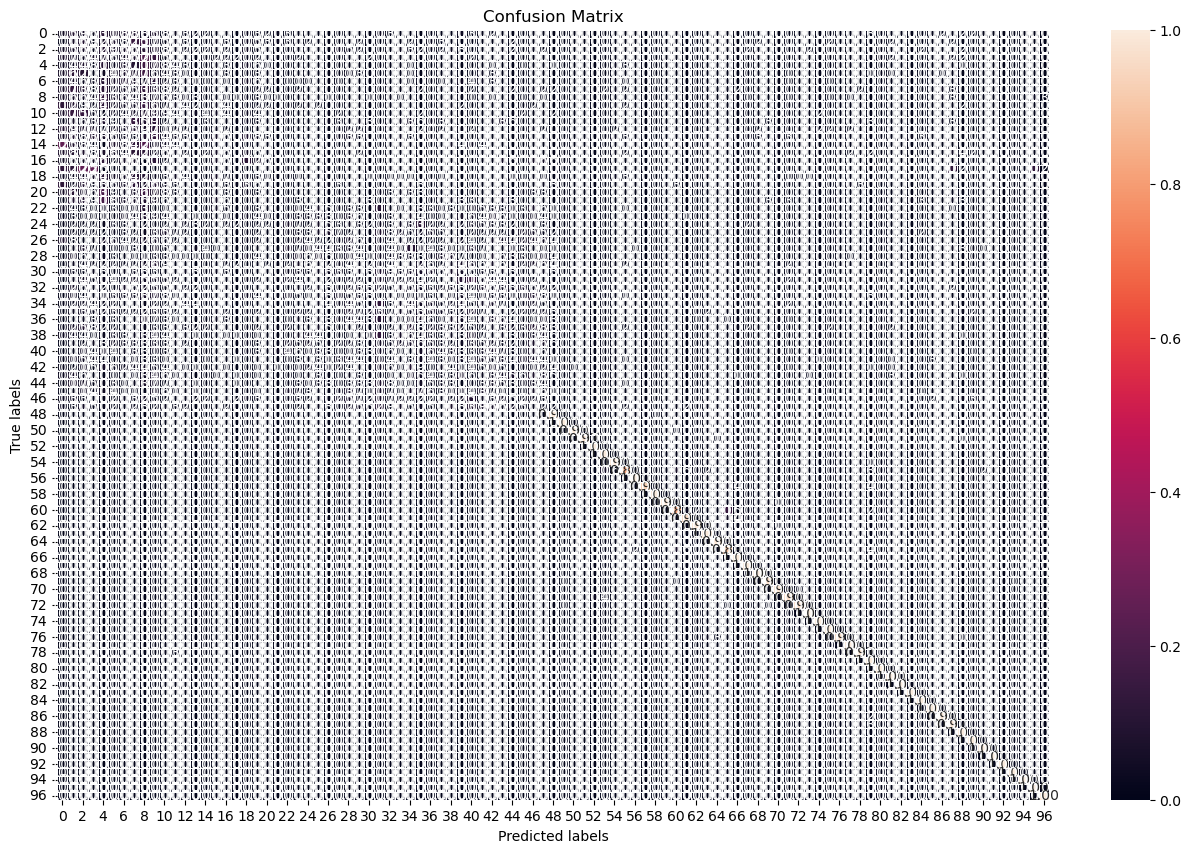

In [12]:
print('Confusion matrix')
Y_pred = model1.predict(X_new)
y_pred = np.argmax(Y_pred, axis=1)
y_test1 = np.argmax(y_new, axis=1)

cm=metrics.confusion_matrix(y_test1, y_pred)


cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
a4_dims = (16, 10)
fig,ax= plt.subplots(figsize=a4_dims)
sns.heatmap(cm, annot=True, fmt=".2f", ax=ax,  linewidth=.5);  
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.set_xticklabels(CATEGORIES)
ax.set_yticklabels(CATEGORIES)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.setp(ax.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.savefig(load_path+model_name1+'_cm.png',bbox_inches='tight')
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape

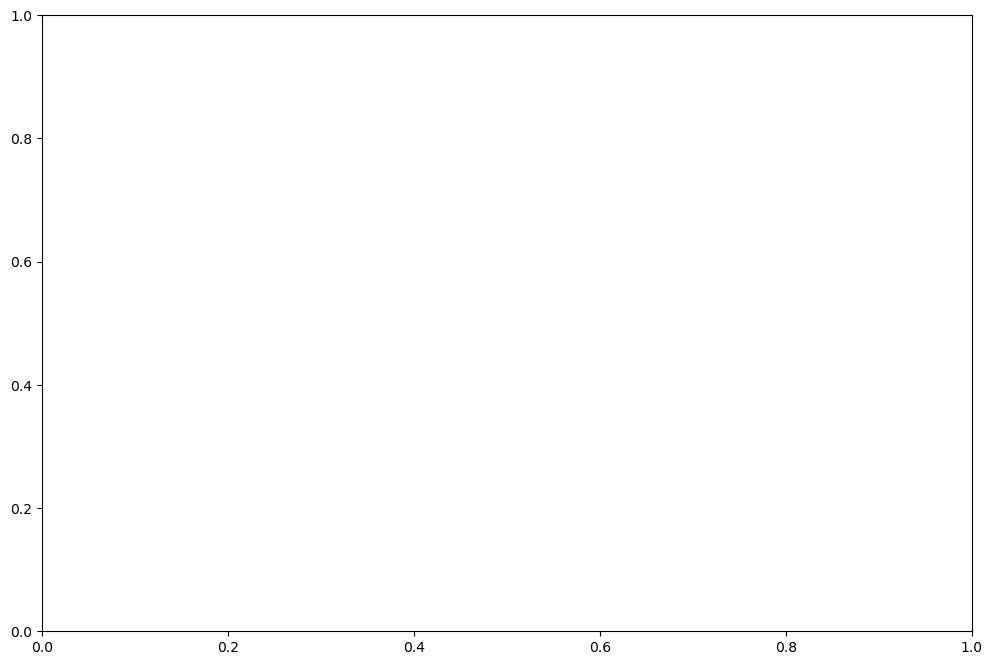

In [13]:
#PLot fractional incorrect misclassifications

incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)

fig, ax = plt.subplots(figsize=(12,8))
plt.bar(np.arange(cat_len), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(cat_len), CATEGORIES)
plt.savefig(load_path+model_name1+'_incorrect_percentage.png',bbox_inches='tight')
plt.show()

Predicted Label:  6
True Label:  frog


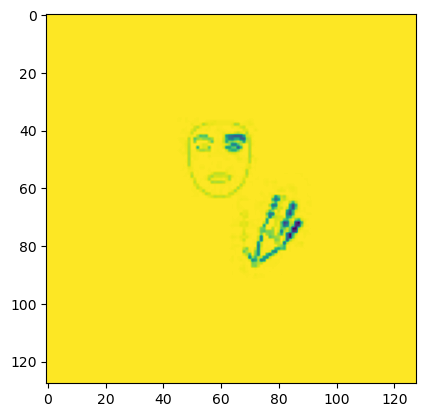

In [42]:
#CHECK RANDOM IMAGES FROM TESTED DATA WHETHER RIGHT OR WRONG

i = random.randint(1,cat_len)
plt.imshow(X_new[i,:,:,2]) 
print("Predicted Label: ", CATEGORIES[int(y_pred[i])])
print("True Label: ", CATEGORIES[int(y_test1[i])])

True Label:  rain


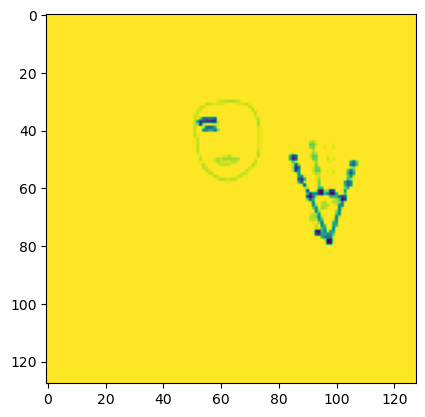

In [49]:
i = random.randint(1,cat_len) 
plt.imshow(X_train[i,:,:,1])
y_train1 = np.argmax(y_train, axis=1)
print("True Label: ", CATEGORIES[int(y_train1[i])])

In [51]:
print(y_train[i])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Colourful mediapipe testing with VA_create_3.0

In [ ]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results
    
def draw_landmarks(image, results):   
    #face
    mp_drawing.draw_landmarks(
        image,
        results.face_landmarks,
        mp_holistic.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_contours_style())
#     #pose
#     mp_drawing.draw_landmarks(
#         image,
#         results.pose_landmarks,
#         mp_holistic.POSE_CONNECTIONS,
#         landmark_drawing_spec=mp_drawing_styles
#         .get_default_pose_landmarks_style())
    
    #left hand
    mp_drawing.draw_landmarks(
        image,
        results.left_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
#         landmark_drawing_spec=None,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
    # right hand
    mp_drawing.draw_landmarks(
        image,
        results.right_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
#         landmark_drawing_spec=None,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

In [ ]:
## For veryyyyyyyy beautiful webcam input:

cap = cv2.VideoCapture(0)
org = (20, 20)  
org1 = (310, 20) 
fontScale = 0.65  
font = cv2.FONT_HERSHEY_SIMPLEX
# Blue color in BGR
color = (130, 0, 0)  
# Line thickness of 2 px
thickness = 1 
thickness1 = -1
start_point = (0,0)
end_point = (480,30)
color1 = (255, 255, 255)  

with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
      while cap.isOpened():
        #image from feeder
        r, img_array = cap.read()
        img_array = cv2.flip(img_array, 1)
        img_array = img_array[:, 80:560, :]
        image, results = mediapipe_detection(img_array, holistic)
        draw_landmarks(image, results)
        if not (results.left_hand_landmarks or results.right_hand_landmarks):
            continue

        # white background
        img = np.zeros([480,480,3],dtype=np.uint8)
        img.fill(255) 
        draw_landmarks(img, results)

        # for prediction
        IMG_SIZE=128
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X = np.array(img).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
        X = X.astype('float32')
        X /= 255
        X = np.array(X)
        Y = model1.predict(X)

        if np.max(Y)>0.2:
            # for display
            image = cv2.rectangle(image, start_point, end_point, color1, thickness1)
            image = cv2.rectangle(image, (0,30), (480,30), color, 2)
            image = cv2.putText(image,"Prediction: "+ CATEGORIES[np.argmax(Y)], org, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
            image = cv2.putText(image,"Accuracy: "+ "%.2f" % np.max(Y), org1, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
            if np.max(Y)>0.95:
                cv2.imwrite(load_path+'/test_images/'+CATEGORIES[np.argmax(Y)]+str(np.max(Y))+'.jpg',image)


        cv2.imshow('Realtime testing', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
                break
# close the camera
cap.release()

# close all the opened windows
cv2.destroyAllWindows()